In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DF = pd.read_csv("Messy_Sales_Data.csv")

In [3]:
df = DF.copy()
df

,OrderID,Date,Customer Name,Email,Phone,Product,Quantity,Price,Total
0,1001,2023.01.18,Sarah,sarah@outlook.com,NaN,phone,3,500,1500.0
1,1002,23-01-18,Jane Doe,jane.doe@yahoo.com,987654321,Phone,1,800$,800.0
2,1003,2023.01.06,Anna,anna@yahoo.com,+1 234 567 8901,Camera,2,200$,400.0
3,1004,2023/01/27,Mike Smith,mike.smith@yahoo.com,987654321,Laptop,1,$500,500.0
4,1005,2023/01/18,Mike Smith,mike.smith@gmail.com,+1 234 567 8901,Headphones,three,$300,300.0
...,...,...,...,...,...,...,...,...,...
295,1296,2023.01.18,Robert Jr,robert.jr@hotmail,+1 234 567 8901,Headphones,2,50,100.0
296,1297,2023/01/09,Tom Lee,tom.lee@yahoo.com,987654321,Headphones,three,$300,300.0
297,1298,07-01-2023,Chris Paul,chris.paul@yahoo.com,9876543210,Phone,three,200,200.0
298,1299,23-01-13,Jane Doe,jane.doe@yahoo.com,987654321,Tablet,2,500$,1000.0


In [4]:
df.isnull().sum()

OrderID           0
Date              0
Customer Name     0
Email             0
Phone            62
Product           0
Quantity          0
Price             0
Total            37
dtype: int64

In [5]:
df.loc[df["Quantity"].str.strip().str.lower() == "three", "Quantity"] = 3

In [6]:
df

,OrderID,Date,Customer Name,Email,Phone,Product,Quantity,Price,Total
0,1001,2023.01.18,Sarah,sarah@outlook.com,NaN,phone,3,500,1500.0
1,1002,23-01-18,Jane Doe,jane.doe@yahoo.com,987654321,Phone,1,800$,800.0
2,1003,2023.01.06,Anna,anna@yahoo.com,+1 234 567 8901,Camera,2,200$,400.0
3,1004,2023/01/27,Mike Smith,mike.smith@yahoo.com,987654321,Laptop,1,$500,500.0
4,1005,2023/01/18,Mike Smith,mike.smith@gmail.com,+1 234 567 8901,Headphones,3,$300,300.0
...,...,...,...,...,...,...,...,...,...
295,1296,2023.01.18,Robert Jr,robert.jr@hotmail,+1 234 567 8901,Headphones,2,50,100.0
296,1297,2023/01/09,Tom Lee,tom.lee@yahoo.com,987654321,Headphones,3,$300,300.0
297,1298,07-01-2023,Chris Paul,chris.paul@yahoo.com,9876543210,Phone,3,200,200.0
298,1299,23-01-13,Jane Doe,jane.doe@yahoo.com,987654321,Tablet,2,500$,1000.0


In [7]:
df.loc[df["Quantity"].str.strip().str.lower() == "two", "Quantity"] = 2

In [8]:
df["Quantity"] = df["Quantity"].map(int)

In [9]:
df.rename(columns={"Price":"Price in $"}, inplace=True)

In [10]:
df

,OrderID,Date,Customer Name,Email,Phone,Product,Quantity,Price in $,Total
0,1001,2023.01.18,Sarah,sarah@outlook.com,NaN,phone,3,500,1500.0
1,1002,23-01-18,Jane Doe,jane.doe@yahoo.com,987654321,Phone,1,800$,800.0
2,1003,2023.01.06,Anna,anna@yahoo.com,+1 234 567 8901,Camera,2,200$,400.0
3,1004,2023/01/27,Mike Smith,mike.smith@yahoo.com,987654321,Laptop,1,$500,500.0
4,1005,2023/01/18,Mike Smith,mike.smith@gmail.com,+1 234 567 8901,Headphones,3,$300,300.0
...,...,...,...,...,...,...,...,...,...
295,1296,2023.01.18,Robert Jr,robert.jr@hotmail,+1 234 567 8901,Headphones,2,50,100.0
296,1297,2023/01/09,Tom Lee,tom.lee@yahoo.com,987654321,Headphones,3,$300,300.0
297,1298,07-01-2023,Chris Paul,chris.paul@yahoo.com,9876543210,Phone,3,200,200.0
298,1299,23-01-13,Jane Doe,jane.doe@yahoo.com,987654321,Tablet,2,500$,1000.0


In [11]:
df["Price in $"] = df["Price in $"].str.replace("$", "", regex=False).str.strip()

In [12]:
df["Price in $"] = df["Price in $"].astype(float)

In [13]:
df.isnull().sum()

OrderID           0
Date              0
Customer Name     0
Email             0
Phone            62
Product           0
Quantity          0
Price in $        0
Total            37
dtype: int64

In [14]:
df["Total"] = df["Quantity"] * df["Price in $"]

In [15]:
df["Total"] = df["Total"].astype(float)

In [16]:
# Inconsistent Date format
df.loc[0:10, "Date"]

0     2023.01.18
1       23-01-18
2     2023.01.06
3     2023/01/27
4     2023/01/18
5       23-01-10
6     2023/01/04
7     06/01/2023
8       23-01-31
9       23-01-17
10    21/01/2023
Name: Date, dtype: object

In [17]:
df["Date"] = df["Date"].str.replace("/", "-", regex=False).str.strip()
df["Date"] = df["Date"].str.replace(".", "-", regex=False).str.strip()

In [18]:
# Proper conversion of date columns
def parse_date(x):
    for fmt in ("%Y-%m-%d", "%y-%m-%d", "%d-%m-%y", "%d-%m-%Y"):
        try:
            return pd.to_datetime(x, format=fmt)
        except ValueError:
            continue
    return pd.NaT

df["Date"] = df["Date"].apply(parse_date)
df["Date"] = df["Date"].dt.strftime("%Y-%m-%d")

In [19]:
df

,OrderID,Date,Customer Name,Email,Phone,Product,Quantity,Price in $,Total
0,1001,2023-01-18,Sarah,sarah@outlook.com,NaN,phone,3,500.0,1500.0
1,1002,2023-01-18,Jane Doe,jane.doe@yahoo.com,987654321,Phone,1,800.0,800.0
2,1003,2023-01-06,Anna,anna@yahoo.com,+1 234 567 8901,Camera,2,200.0,400.0
3,1004,2023-01-27,Mike Smith,mike.smith@yahoo.com,987654321,Laptop,1,500.0,500.0
4,1005,2023-01-18,Mike Smith,mike.smith@gmail.com,+1 234 567 8901,Headphones,3,300.0,900.0
...,...,...,...,...,...,...,...,...,...
295,1296,2023-01-18,Robert Jr,robert.jr@hotmail,+1 234 567 8901,Headphones,2,50.0,100.0
296,1297,2023-01-09,Tom Lee,tom.lee@yahoo.com,987654321,Headphones,3,300.0,900.0
297,1298,2023-01-07,Chris Paul,chris.paul@yahoo.com,9876543210,Phone,3,200.0,600.0
298,1299,2023-01-13,Jane Doe,jane.doe@yahoo.com,987654321,Tablet,2,500.0,1000.0


In [20]:
df.loc[df["Customer Name"] == ' ', "Customer Name"] = "NaN"

In [21]:
(df["Customer Name"] == "NaN").sum()

10

In [22]:
df.loc[df["Customer Name"].str.strip().str.lower() == "nan", "Customer Name"] = df["Email"]

In [23]:
df

,OrderID,Date,Customer Name,Email,Phone,Product,Quantity,Price in $,Total
0,1001,2023-01-18,Sarah,sarah@outlook.com,NaN,phone,3,500.0,1500.0
1,1002,2023-01-18,Jane Doe,jane.doe@yahoo.com,987654321,Phone,1,800.0,800.0
2,1003,2023-01-06,Anna,anna@yahoo.com,+1 234 567 8901,Camera,2,200.0,400.0
3,1004,2023-01-27,Mike Smith,mike.smith@yahoo.com,987654321,Laptop,1,500.0,500.0
4,1005,2023-01-18,Mike Smith,mike.smith@gmail.com,+1 234 567 8901,Headphones,3,300.0,900.0
...,...,...,...,...,...,...,...,...,...
295,1296,2023-01-18,Robert Jr,robert.jr@hotmail,+1 234 567 8901,Headphones,2,50.0,100.0
296,1297,2023-01-09,Tom Lee,tom.lee@yahoo.com,987654321,Headphones,3,300.0,900.0
297,1298,2023-01-07,Chris Paul,chris.paul@yahoo.com,9876543210,Phone,3,200.0,600.0
298,1299,2023-01-13,Jane Doe,jane.doe@yahoo.com,987654321,Tablet,2,500.0,1000.0


In [24]:
df["Customer Name"] = df["Customer Name"].str.split("@", regex=False).str[0]

In [25]:
df

,OrderID,Date,Customer Name,Email,Phone,Product,Quantity,Price in $,Total
0,1001,2023-01-18,Sarah,sarah@outlook.com,NaN,phone,3,500.0,1500.0
1,1002,2023-01-18,Jane Doe,jane.doe@yahoo.com,987654321,Phone,1,800.0,800.0
2,1003,2023-01-06,Anna,anna@yahoo.com,+1 234 567 8901,Camera,2,200.0,400.0
3,1004,2023-01-27,Mike Smith,mike.smith@yahoo.com,987654321,Laptop,1,500.0,500.0
4,1005,2023-01-18,Mike Smith,mike.smith@gmail.com,+1 234 567 8901,Headphones,3,300.0,900.0
...,...,...,...,...,...,...,...,...,...
295,1296,2023-01-18,Robert Jr,robert.jr@hotmail,+1 234 567 8901,Headphones,2,50.0,100.0
296,1297,2023-01-09,Tom Lee,tom.lee@yahoo.com,987654321,Headphones,3,300.0,900.0
297,1298,2023-01-07,Chris Paul,chris.paul@yahoo.com,9876543210,Phone,3,200.0,600.0
298,1299,2023-01-13,Jane Doe,jane.doe@yahoo.com,987654321,Tablet,2,500.0,1000.0


In [26]:
df["Customer Name"] = df["Customer Name"].replace({"robert.jr": "Robert Jr", "sarah":"Sarah", "chris.paul":"Chris Paul", "mike.smith":"Mike Smith"})

In [27]:
df

,OrderID,Date,Customer Name,Email,Phone,Product,Quantity,Price in $,Total
0,1001,2023-01-18,Sarah,sarah@outlook.com,NaN,phone,3,500.0,1500.0
1,1002,2023-01-18,Jane Doe,jane.doe@yahoo.com,987654321,Phone,1,800.0,800.0
2,1003,2023-01-06,Anna,anna@yahoo.com,+1 234 567 8901,Camera,2,200.0,400.0
3,1004,2023-01-27,Mike Smith,mike.smith@yahoo.com,987654321,Laptop,1,500.0,500.0
4,1005,2023-01-18,Mike Smith,mike.smith@gmail.com,+1 234 567 8901,Headphones,3,300.0,900.0
...,...,...,...,...,...,...,...,...,...
295,1296,2023-01-18,Robert Jr,robert.jr@hotmail,+1 234 567 8901,Headphones,2,50.0,100.0
296,1297,2023-01-09,Tom Lee,tom.lee@yahoo.com,987654321,Headphones,3,300.0,900.0
297,1298,2023-01-07,Chris Paul,chris.paul@yahoo.com,9876543210,Phone,3,200.0,600.0
298,1299,2023-01-13,Jane Doe,jane.doe@yahoo.com,987654321,Tablet,2,500.0,1000.0


In [28]:
df["Phone"] = df["Phone"].fillna("Unknown")

In [29]:
df["Product"] = df["Product"].str.capitalize()

In [81]:
df.rename(columns={"Total":"Total Revenue"}, inplace=True)

In [100]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [82]:
df

,OrderID,Date,Customer Name,Email,Phone,Product,Quantity,Price in $,Total Revenue
0,1001,2023-01-18,Sarah,sarah@outlook.com,Unknown,Phone,3,500.0,1500.0
1,1002,2023-01-18,Jane Doe,jane.doe@yahoo.com,987654321,Phone,1,800.0,800.0
2,1003,2023-01-06,Anna,anna@yahoo.com,+1 234 567 8901,Camera,2,200.0,400.0
3,1004,2023-01-27,Mike Smith,mike.smith@yahoo.com,987654321,Laptop,1,500.0,500.0
4,1005,2023-01-18,Mike Smith,mike.smith@gmail.com,+1 234 567 8901,Headphones,3,300.0,900.0
...,...,...,...,...,...,...,...,...,...
295,1296,2023-01-18,Robert Jr,robert.jr@hotmail,+1 234 567 8901,Headphones,2,50.0,100.0
296,1297,2023-01-09,Tom Lee,tom.lee@yahoo.com,987654321,Headphones,3,300.0,900.0
297,1298,2023-01-07,Chris Paul,chris.paul@yahoo.com,9876543210,Phone,3,200.0,600.0
298,1299,2023-01-13,Jane Doe,jane.doe@yahoo.com,987654321,Tablet,2,500.0,1000.0


In [83]:
# This is Our final Data
df.to_csv("Cleaned_Data.csv", index=False)

In [85]:
# Lets answer the questions now
# Tell us the Sales by Product Category
df.groupby("Product")["Total Revenue"].sum()

Product
Camera        50300.0
Headphones    59300.0
Laptop        48300.0
Phone         52550.0
Tablet        36900.0
Name: Total Revenue, dtype: float64

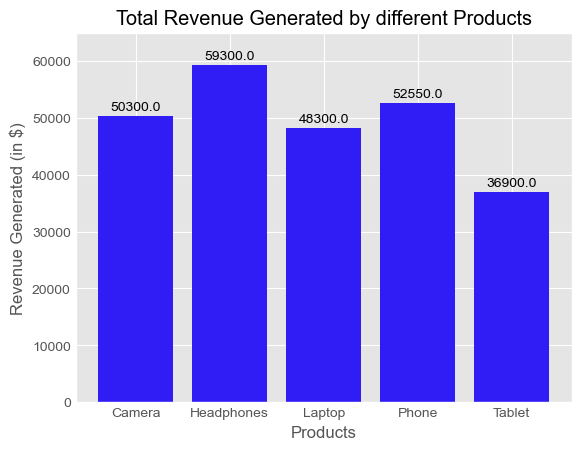

In [88]:
products = ["Camera", "Headphones", "Laptop", "Phone", "Tablet"]
revenue = [50300.0,59300.0,48300.0,52550.0,36900.0]
plt.bar(products, revenue, label="Products", color="#301DF5")
plt.xlabel("Products")
plt.ylim(0, 65000)
plt.ylabel("Revenue Generated (in $)")
plt.title("Total Revenue Generated by different Products")
plt.style.use('ggplot')
for i in range(len(products)):
    plt.text(i, revenue[i] + 1000, str(revenue[i]), ha='center')
plt.show()

In [90]:
# Quantity vs. Total Sales
df.groupby("Product")["Quantity"].sum()

Product
Camera        132
Headphones    169
Laptop        134
Phone         122
Tablet        114
Name: Quantity, dtype: int64

In [92]:
df.groupby("Product")["Total Revenue"].sum()

Product
Camera        50300.0
Headphones    59300.0
Laptop        48300.0
Phone         52550.0
Tablet        36900.0
Name: Total Revenue, dtype: float64

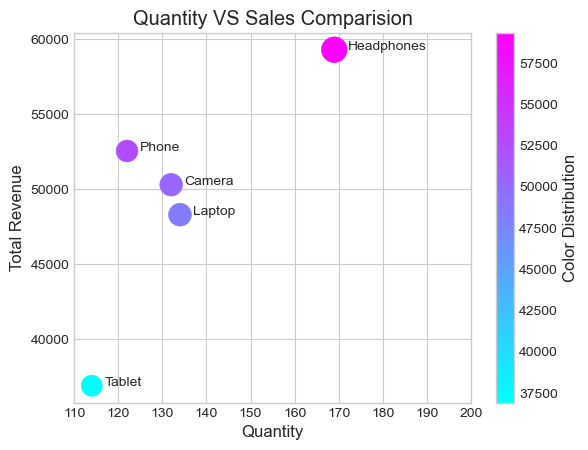

In [128]:
products = ["Camera", "Headphones", "Laptop", "Phone", "Tablet"]
Quantity = [132, 169, 134, 122, 114]
revenue = [50300.0,59300.0,48300.0,52550.0,36900.0]
size = [money * 2 for money in Quantity]

plt.scatter(Quantity, revenue, c=revenue, cmap='cool', s=size, label="Products")
plt.colorbar(label="Color Distribution")
plt.title("Quantity VS Sales Comparision")
plt.xlim(110, 200)
plt.xlabel("Quantity")
plt.ylabel("Total Revenue")
plt.style.use('seaborn-v0_8-whitegrid')
plt.grid(True)
for i in range(len(products)):
    plt.annotate(f"{products[i]}", (Quantity[i] + 3, revenue[i]))

In [151]:
# Daily Sales Trend (Time Series)
revenues = df.groupby("Date")["Total Revenue"].sum().tolist()

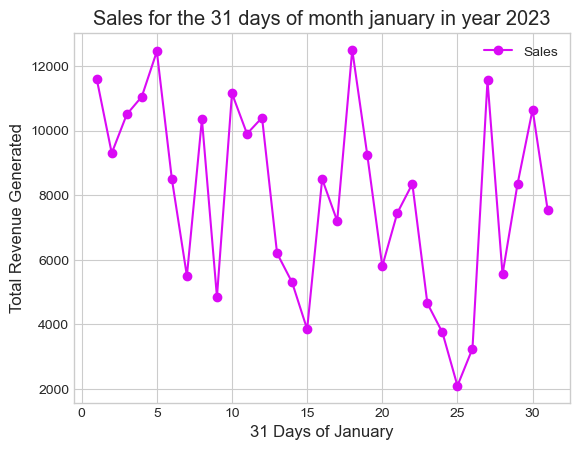

In [148]:
days = [i for i in range(1,32)]
revenue = revenues
plt.plot(days, revenue, 'o-' ,label="Sales", color="#DA0AF5")
plt.xlabel("31 Days of January")
plt.ylabel("Total Revenue Generated")
plt.title("Sales for the 31 days of month january in year 2023")
plt.legend()
plt.grid(True)
plt.show()